<div align=left style="width: 200; height: 80px; overflow: hidden">
    <img src=http://static1.squarespace.com/static/571446ff60b5e92c3a2b4249/57d8a40b9de4bb459f731cf3/58cb2f229de4bb4a049d38c2/1505340359463/teselaGenlogo.jpg align=right width=200>
</div>

# Hello World! DESIGN Module

This notebook shows how to use the TG's Python API Client to interact with the DESIGN module.

We start by making some imports

In [1]:
import platform
from pathlib import Path
import pandas as pd

from teselagen.api import TeselaGenClient
from teselagen.utils.plot_tools import plot_plasmid_features

print(f"python version     : {platform.python_version()}")
print(f"pandas version     : {pd.__version__}")

python version     : 3.6.9
pandas version     : 1.1.5


And then login into the platform. You should get "*Connection Accepted*" printed below. 

In [2]:
# Connect to your teselagen instance by passing it as the 'host_url' argument of TeselaGenClient(host_url=host_url)
# client = TeselaGenClient(host_url="https://your-instance-name.teselagen.com")
client = TeselaGenClient()
client.login()
client.select_laboratory(lab_name="The Test Lab")

Connection Accepted
Selected Lab: The Test Lab


In [3]:
print(client.host_url)

https://platform.teselagen.com


Now we will import the DNA sequences named GFP_UV

In [4]:
sequence = client.design.get_dna_sequences(name='GFP_UV')

The `sequence` variable is a list of all sequences named `'GFP_UV'`. We will just get the first one and check the   features it contains

In [5]:
features = sequence[0]['features']
for feat in features:
    print(feat['name'])

pSC101**
araC
GFPuv
RBS
CmR
signal_peptide
XhoI_silent_mutation
pBAD promoter
Operator I2 and I1
operator O1
T0
CAP site
araC promoter
dbl term
BamHI_silent_mutation
operator O2


Each element contains all the information about that particular feature. In the following cell we show the contents of the `GFPuv` feature:

In [6]:
gfp_uv_feature = [feat for feat in features if feat['name']=="GFPuv"][0]
display(gfp_uv_feature)

{'notes': [],
 'id': '3688073',
 'start': 1235,
 'end': 2017,
 'type': 'CDS',
 'name': 'GFPuv',
 'strand': 1,
 'locations': None,
 '__typename': 'sequenceFeature',
 'annotationTypePlural': 'features',
 'forward': True,
 'color': '#EF6500'}

We can use the above object to get the precise amino acid sequence for that feature:

In [7]:
sequence[0]['sequence'][int(gfp_uv_feature['start']):int(gfp_uv_feature['end'])+1]

'ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATGTTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTACCCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTCTCTTATGGTGTTCAATGCTTTTCCCGTTATCCGGATCATATGAAACGGCATGACTTTTTCAAGAGTGCCATGCCCGAAGGTTATGTACAGGAACGCACTATATCTTTCAAAGATGACGGGAACTACAAGACGCGTGCTGAAGTCAAGTTTGAAGGTGATACCCTTGTTAATCGTATCGAGTTAAAAGGTATTGATTTTAAAGAAGATGGAAACATTCTCGGACACAAACTCGAATACAACTATAACTCACACAATGTATACATCACGGCAGACAAACAAAAGAATGGAATCAAAGCTAACTTCAAAATTCGCCACAACATTGAAGATGGATCTGTTCAACTAGCAGACCATTATCAACAAAATACTCCAATTGGCGATGGCCCTGTCCTTTTACCAGACAACCATTACCTGTCGACACAATCTGCCCTTTCGAAAGATCCCAACGAAAAGCGTGACCACATGGTCCTTCTTGAGTTTGTAACTGCTGCTGGGATTACACATGGCATGGATGAGCTCGGCGGCGGCGGCAGCAAGGTCTACGGCAAGGAACAGTTTTTGCGGATGCGCCAGAGCATGTTCCCCGATCGCTAA'

We can also make a plot of all features by using [dna_features_viewer library](https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer) (see plot_plasmid_features implementation for details). As there are many features we will just focust on the biggest ones (> 100 base pairs)

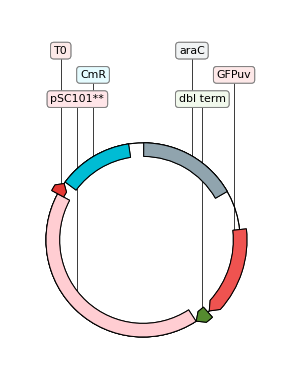

In [8]:
_ = plot_plasmid_features(plasmid_length=len(sequence[0]['sequence']), 
                         features=[feat for feat in features if feat['end']-feat['start']>100])